In [ ]:
!pip install elbowK


In [11]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from elbowK.elbow import find_best_k
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [2]:
df = pd.read_csv("spending_l9_dataset.csv")

In [5]:
print(df.head())

   CustomerID  Age  Income_$  SpendingScore  VisitsPerMonth  OnlinePurchases  \
0           1   28        33             78              14                9   
1           2   21        25             87               8               23   
2           3   23        24             88              13               10   
3           4   24        25             73              16               11   
4           5   20        23             88              17               16   

   Gender Region  
0  Female   East  
1    Male  North  
2    Male  South  
3  Female   West  
4    Male   West  


In [3]:
FEATURES = ["Income_$", "SpendingScore"]

In [4]:
X = df[FEATURES].copy()

In [9]:
print(X.head())

   Income_$  SpendingScore
0        33             78
1        25             87
2        24             88
3        25             73
4        23             88


In [10]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Income_$       200 non-null    int64
 1   SpendingScore  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB
None


In [11]:
print("there are no missing values")

there are no missing values


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
print("After",X_scaled[:5])

After [[-0.62783049  0.72998073]
 [-0.89031514  1.07359091]
 [-0.92312573  1.11176982]
 [-0.89031514  0.53908619]
 [-0.95593631  1.11176982]]


In [7]:
import os
os.environ["OMP_NUM_THREADS"]="1"

In [12]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia = kmeans.inertia_
    print(f'K={k}, Inertia={inertia:.3f}')

K=1, Inertia=400.000
K=2, Inertia=199.698
K=3, Inertia=79.370
K=4, Inertia=21.372
K=5, Inertia=19.088
K=6, Inertia=15.650
K=7, Inertia=14.478
K=8, Inertia=13.809
K=9, Inertia=12.942
K=10, Inertia=11.525


In [9]:
print("this is how the instruction is but let me check elbowK ")

this is how the instruction is but let me check elbowK 


In [13]:
km = KMeans(n_clusters=4, random_state=42)
labels = km.fit_predict(X_scaled)
df['Cluster'] = labels.astype(int)
print(df.head()) 

   CustomerID  Age  Income_$  SpendingScore  VisitsPerMonth  OnlinePurchases  \
0           1   28        33             78              14                9   
1           2   21        25             87               8               23   
2           3   23        24             88              13               10   
3           4   24        25             73              16               11   
4           5   20        23             88              17               16   

   Gender Region  Cluster  
0  Female   East        2  
1    Male  North        2  
2    Male  South        2  
3  Female   West        2  
4    Male   West        2  


Optimal k: 4


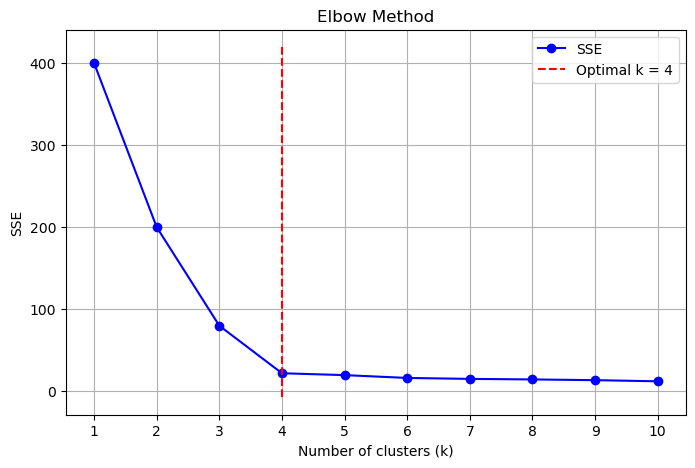

In [14]:
best_k = find_best_k(X_scaled, max_k=10, save_plot=True)
print(f"Optimal k: {best_k}")

In [15]:
print("4 is the best")

4 is the best


In [17]:
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
print("Model Evaluation Metrics:    ")
print(f'Silhouette Score: {silhouette_avg:.3f} (closer to 1 is better)')
print(f'Davies-Bouldin Index: {davies_bouldin_avg:.3f} (closer to 0 is better)')

Model Evaluation Metrics:    
Silhouette Score: 0.729 (closer to 1 is better)
Davies-Bouldin Index: 0.387 (closer to 0 is better)


In [18]:
centers_scaled = km.cluster_centers_
original_centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(original_centers, columns=FEATURES)

print("Change to Original unit : ",centers_df.round(2))

Change to Original unit :     Income_$  SpendingScore
0     56.32          53.58
1     28.92          19.60
2     24.14          83.10
3     99.16          79.24


In [24]:
 sample_index = [0, 180, 73]
sample_customers = df.loc[sample_index, FEATURES+['Cluster']]
print("Sample Customers with Cluster Assignments:")
print(sample_customers)

Sample Customers with Cluster Assignments:
     Income_$  SpendingScore  Cluster
0          33             78        2
180        94             76        3
73         48             67        0


In [22]:
df.to_csv('spending_labeled_clusters.csv', index=False)